In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm

In [2]:
returns = pd.read_csv('marketing_campaign.csv',sep="\t")
returns

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
#Checking null values (empty cells)
#Income has 24 null values.
returns.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
#Fill the 24 empty cells with median income value.
print(returns['Income'].median())
returns['Income'] = returns['Income'].fillna(returns['Income'].median())

51381.5


In [5]:
#We will delete "Z_CostContact" and "Z_Revenue" since they consist of same values for each row. They do not contribute to the data set modeling.
returns = returns.drop(['Z_CostContact', 'Z_Revenue'],axis=1)

In [6]:
#We will delete many vairbales that won't be used.
returns = returns.drop(['ID', 'Dt_Customer', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'], axis=1)

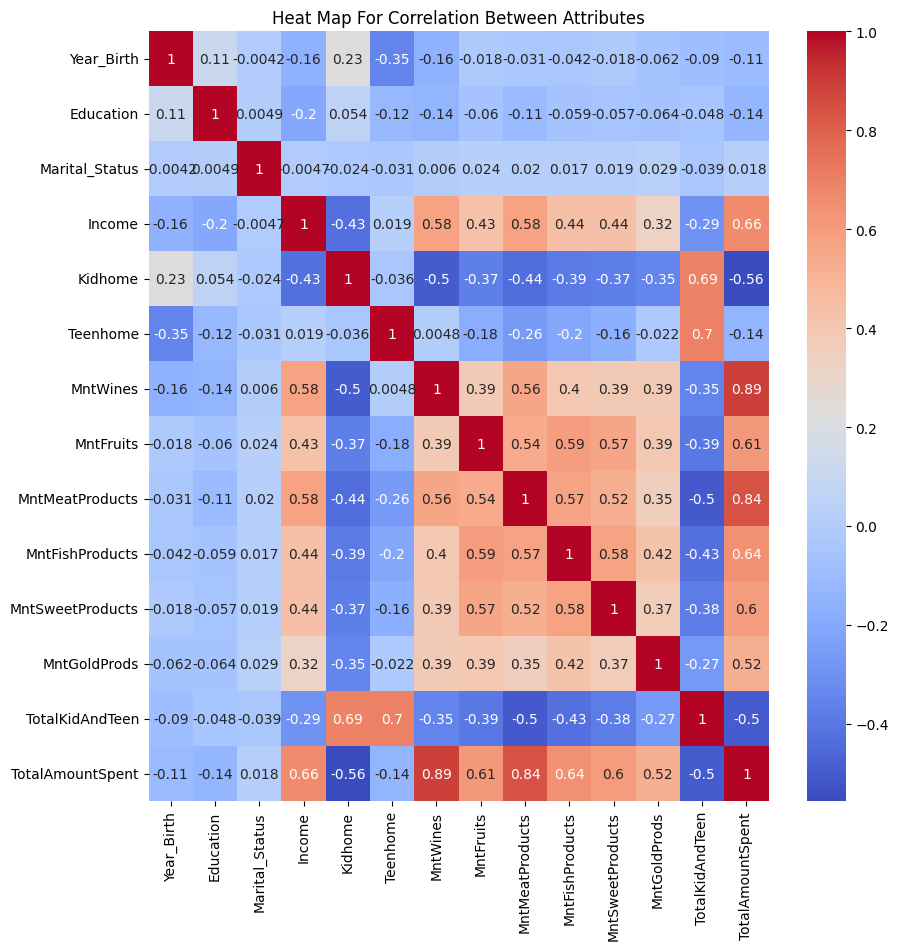

In [20]:
#Heatmap
#There is no two attributes that show strong correlation, so we cannot drop any attributes (columns).
plt.figure(figsize=(10,10))
ax = sns.heatmap( returns.corr(), cmap= "coolwarm", annot = True )
plt.title( "Heat Map For Correlation Between Attributes" )
plt.show()

In [8]:
#Descriptive dataset 
returns.describe()

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,11.984069,25037.955891,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,1970.000000,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,1977.000000,68289.750000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1996.000000,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


# ***Univariate Analysis***

# ***People Attributes Analysis***

1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64
count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64


Text(0.5, 0, 'Year of Birth')

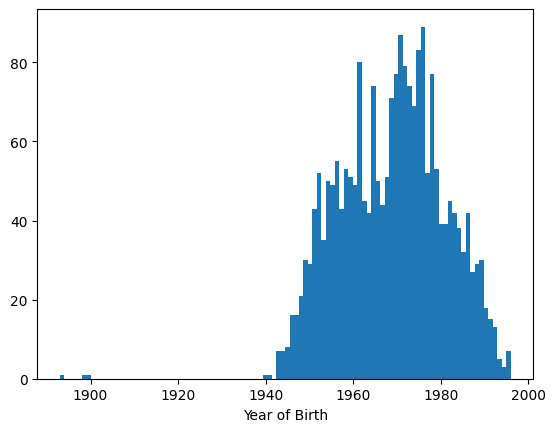

In [9]:
#Year_Birth
print(returns['Year_Birth'].value_counts())
print(returns['Year_Birth'].describe())

#Histogram
plt.hist(returns['Year_Birth'], density=False, bins=100) 
plt.xlabel('Year of Birth')

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
count           2240
unique             5
top       Graduation
freq            1127
Name: Education, dtype: object


Text(0.5, 0, 'Education')

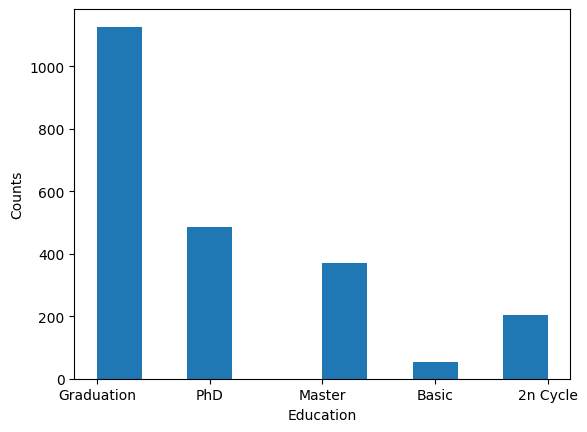

In [10]:
#Education
print(returns['Education'].value_counts())
print(returns['Education'].describe())

#Histogram
plt.hist(returns['Education'], density=False, bins=10) 
plt.ylabel('Counts')
plt.xlabel('Education')

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
count        2240
unique          8
top       Married
freq          864
Name: Marital_Status, dtype: object


Text(0.5, 0, 'Marital_Status')

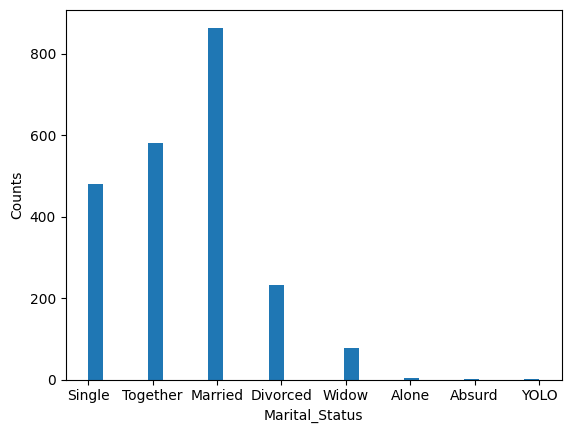

In [11]:
#Marital_Status
print(returns['Marital_Status'].value_counts())
print(returns['Marital_Status'].describe())

#Histogram
plt.hist(returns['Marital_Status'], density=False, bins=30) 
plt.ylabel('Counts')
plt.xlabel('Marital_Status')

51381.5    24
7500.0     12
35860.0     4
37760.0     3
83844.0     3
           ..
40760.0     1
41452.0     1
6835.0      1
33622.0     1
52869.0     1
Name: Income, Length: 1975, dtype: int64
count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64


Text(0.5, 0, 'Income')

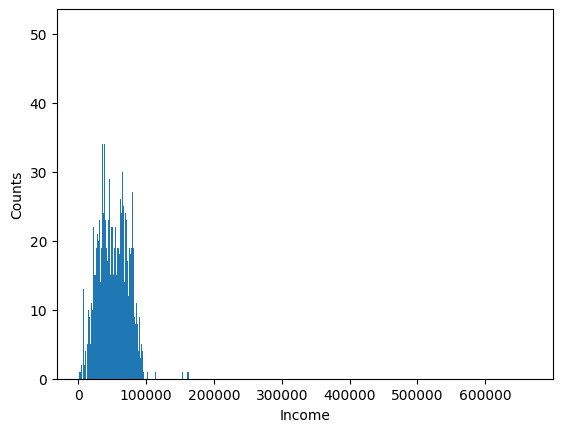

In [12]:
#Income
print(returns['Income'].value_counts())
print(returns['Income'].describe())

#Histogram
plt.hist(returns['Income'], density=False, bins=1000) 
plt.ylabel('Counts')
plt.xlabel('Income')

#Max income is $666666; Min income is $1730; Average income is $52247.25.

1    1128
0     638
2     421
3      53
Name: TotalKidAndTeen, dtype: int64
count    2240.000000
mean        0.950446
std         0.751803
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: TotalKidAndTeen, dtype: float64


Text(0.5, 0, 'TotalKidAndTeen')

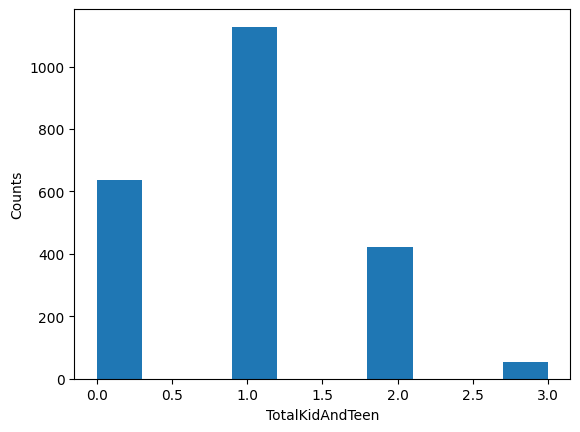

In [13]:
#Kidhome & Teenhome
#Add up Kidhome and Teenhome into TotalKidAndTeen.
returns['TotalKidAndTeen']=returns['Kidhome']+returns['Teenhome']
print(returns['TotalKidAndTeen'].value_counts())
print(returns['TotalKidAndTeen'].describe())

#Histogram
plt.hist(returns['TotalKidAndTeen'], density=False, bins=10) 
plt.ylabel('Counts')
plt.xlabel('TotalKidAndTeen')

28.48% of people have 0 kids; 50.35% of people have 1 kid; 18.79% of people have 2 kids; 2.36% of people have 3 kids.

# ***Products Attributes Analysis***

46      19
22      18
57      16
44      15
55      15
        ..
1345     1
764      1
368      1
292      1
843      1
Name: TotalAmountSpent, Length: 1054, dtype: int64
count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: TotalAmountSpent, dtype: float64


Text(0.5, 0, 'TotalAmountSpent')

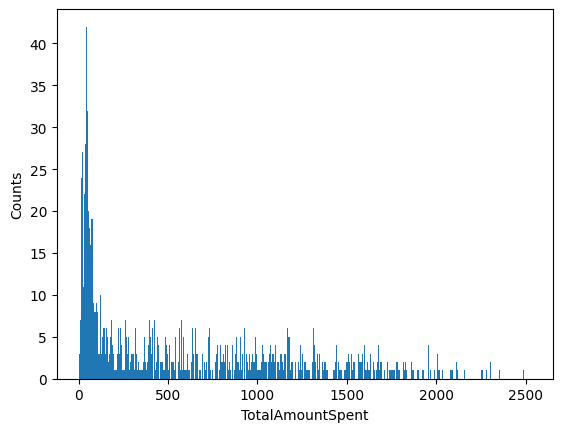

In [14]:
#Total Amount Spent
returns['TotalAmountSpent']=returns['MntWines']+returns['MntFruits']+returns['MntMeatProducts']+returns['MntFishProducts']+returns['MntSweetProducts']+returns['MntGoldProds']
print(returns['TotalAmountSpent'].value_counts())
print(returns['TotalAmountSpent'].describe())

#Histogram
plt.hist(returns['TotalAmountSpent'], density=False, bins=1000) 
plt.ylabel('Counts')
plt.xlabel('TotalAmountSpent')

#Add all expenses together, and generate the descriptive data (Max, Min, Average).

# ***Multivariate Analysis***

In [15]:
#Use 1 to represent people with higher educations; Use 2 to represent people with lower educations
returns['Education']=returns['Education'].replace(['PhD', '2n Cycle', 'Graduation', 'Master'], 1)
returns['Education']=returns['Education'].replace(['Basic'], 2)

In [16]:
#Use 1 to represent people with someone; Use 2 to represent people with themselves
returns['Marital_Status']=returns['Marital_Status'].replace(['Married', 'Together'], 1)
returns['Marital_Status']=returns['Marital_Status'].replace(['Single', 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 2)

In [17]:
#Mutivariate Linear Regression Model
y = returns['TotalAmountSpent']
x = returns[['Year_Birth', 'Education', 'Marital_Status', 'Income', 'TotalKidAndTeen']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       TotalAmountSpent   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     541.5
Date:                Sat, 01 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:47:39   Log-Likelihood:                -16626.
No. Observations:                2240   AIC:                         3.326e+04
Df Residuals:                    2234   BIC:                         3.330e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5250.6813   1447.979     

In [18]:
#Linear Regression Model
y = returns['TotalAmountSpent']
x = returns[['Year_Birth', 'Education', 'Marital_Status', 'Income', 'TotalKidAndTeen']]

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 5250.681263540054
Coefficients: 
 [-2.50505625e+00 -1.47597240e+02  8.51467948e+00  1.32009969e-02
 -2.76598610e+02]
                            OLS Regression Results                            
Dep. Variable:       TotalAmountSpent   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     541.5
Date:                Sat, 01 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:47:39   Log-Likelihood:                -16626.
No. Observations:                2240   AIC:                         3.326e+04
Df Residuals:                    2234   BIC:                         3.330e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.9